<a href="https://colab.research.google.com/github/itsrajreddy/Popularity-prediction-and-Recommendation-of-Music/blob/main/IDMP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

artists = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/IDMP_Proj/artists.csv')
tracks = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/IDMP_Proj/tracks.csv')
genres = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/IDMP_Proj/data_by_genres_o.csv')
years = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/IDMP_Proj/data_by_year_o.csv')
data = '/content/gdrive/My Drive/Colab Notebooks/IDMP_Proj/data.csv'

In [ ]:

import json as simplejson

with open('/content/gdrive/My Drive/Colab Notebooks/IDMP_Proj/dict_artists.json') as json_file:
  dict_artists = simplejson.load(json_file)

In [ ]:
data=pd.read_csv(data,header=0, nrows=50000).sample(frac=1)
data.head()


acousticness                artists  ...  valence  year
28319        0.6300  ['Simon & Garfunkel']  ...    0.510  1964
47582        0.8270         ['Tim Hardin']  ...    0.365  1966
1240         0.9940           ['Georgius']  ...    0.911  1926
30300        0.3230         ['The Meters']  ...    0.763  1974
19843        0.0529   ['The Kelly Family']  ...    0.568  2020

[5 rows x 19 columns]

In [ ]:
data.shape

(50000, 19)

In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [ ]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [ ]:
years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [ ]:
data.shape

(50000, 19)

In [ ]:
# checking if any of the features contain null values
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
data.describe()

acousticness  danceability  ...       valence          year
count  50000.000000  50000.000000  ...  50000.000000  50000.000000
mean       0.562788      0.541857  ...      0.542638   1967.874100
std        0.377602      0.170482  ...      0.257811     27.966741
min        0.000000      0.000000  ...      0.000000   1920.000000
25%        0.156000      0.423000  ...      0.340000   1944.000000
50%        0.662000      0.554000  ...      0.559000   1965.000000
75%        0.941000      0.671000  ...      0.754000   1990.000000
max        0.996000      0.988000  ...      1.000000   2021.000000

[8 rows x 15 columns]

# **Exploratory Data Analysis**

**Popular Artists over the Years**

In [ ]:
import seaborn as sns
sns.pairplot(data, hue='popularity')

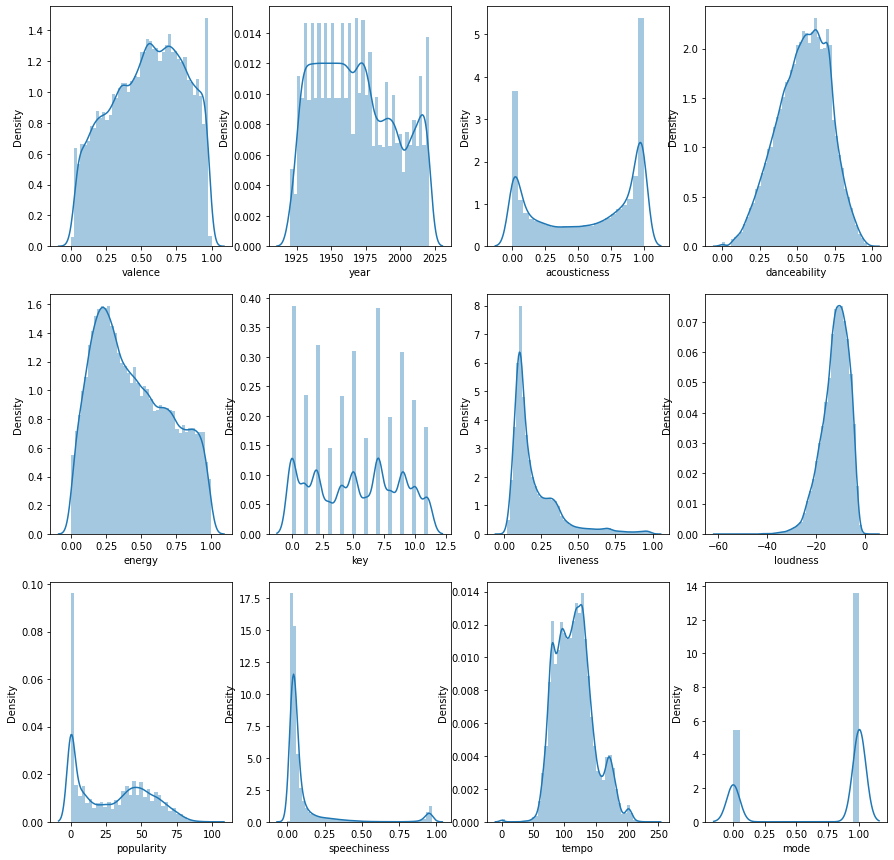

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(3,4,figsize=(15,15))

sns.distplot(data['valence'],ax=ax[0,0])
sns.distplot(data['year'],ax=ax[0,1])
sns.distplot(data['acousticness'],ax=ax[0,2])
sns.distplot(data['danceability'],ax=ax[0,3])
sns.distplot(data['energy'],ax=ax[1,0])
sns.distplot(data['key'],ax=ax[1,1])
sns.distplot(data['liveness'],ax=ax[1,2])
sns.distplot(data['loudness'],ax=ax[1,3])
sns.distplot(data['popularity'],ax=ax[2,0])
sns.distplot(data['speechiness'],ax=ax[2,1])
sns.distplot(data['tempo'],ax=ax[2,2])
sns.distplot(data['mode'],ax=ax[2,3])

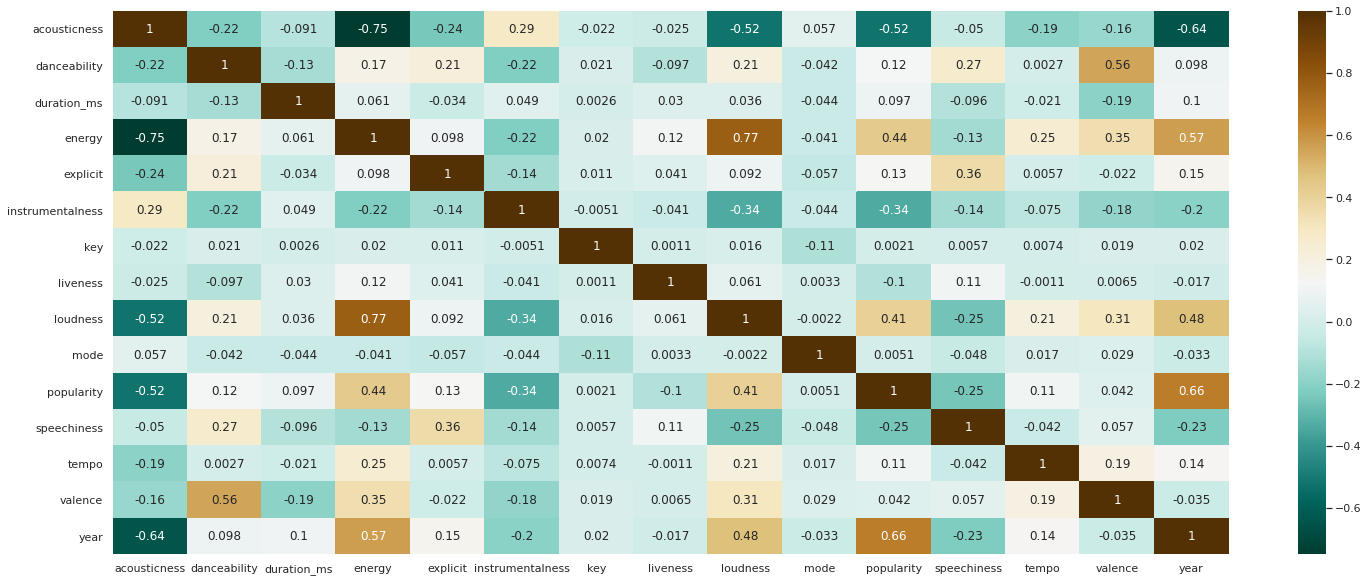

In [ ]:
plt.figure(figsize=(25,10))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

From the above correlation table we can derive some basic insights as to what attributes make a song more popular.

1) As expected popularity is highly correlated with the year released. This makes sense as the Spotify algorithm which makes this decision generates it's "popularity" metric by not just how many streams a song receives, but also how recent those streams are.

2) Energy also seems to influence a song's popularity. Many popular songs are energetic. Because the correlation here is not too high, low energy songs do have some potential to be more popular.

3) Acousticness seems to be uncorrelated with popularity. Most popular songs today have either electronic or electric instruments in them. It is very rare that a piece of music played by a chamber orchestra or purely acoustic band becomes immesely popular (though, again, not impossible).

4) Loudness and energy are highly correlated. This makes some sense as energy is definately influence by the volume the music is being played at.

5) Acousticness is highly negatively correlated with energy, loudness, and year.

6) Valence and dancability are highly coorelated. 

Thus, from this data, it would be better for an artist to create a high energy song with either electric instruments or electronic songs to have the best chance at generating the most popularity.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

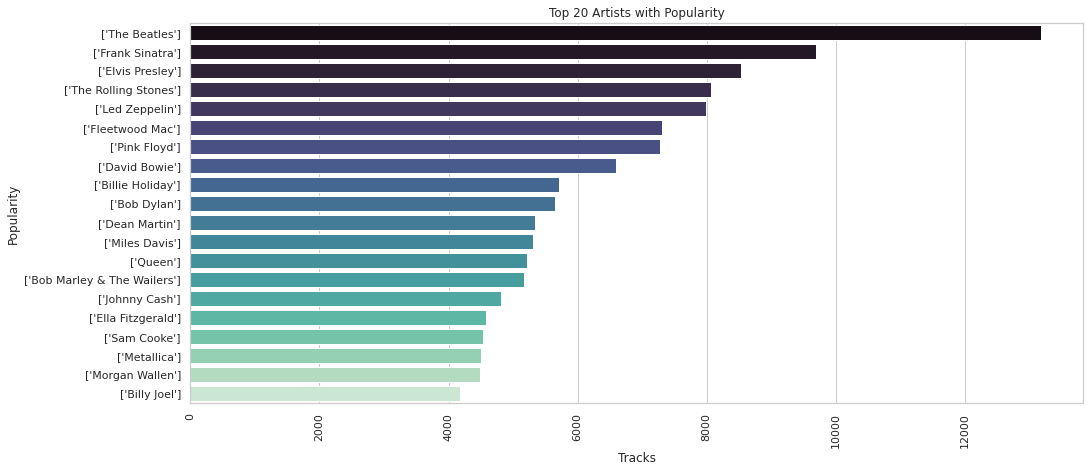

In [ ]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

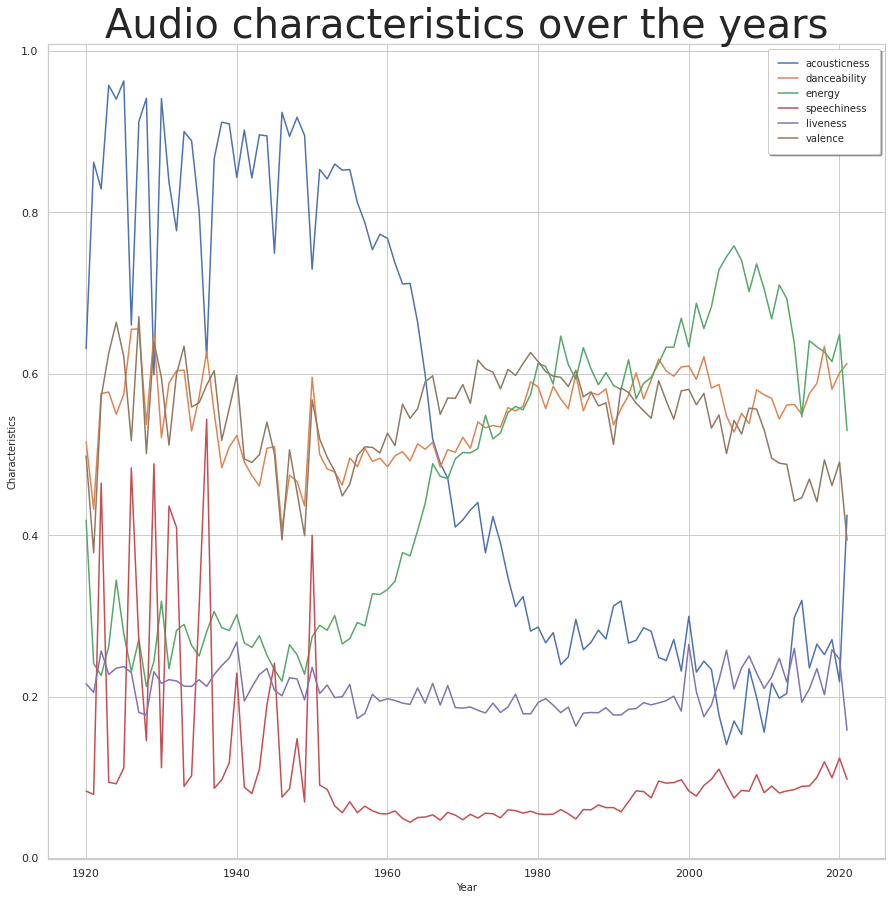

In [ ]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(15,15))
for c in columns:
    x = data.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Characteristics',fontsize=10)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
plt.show()

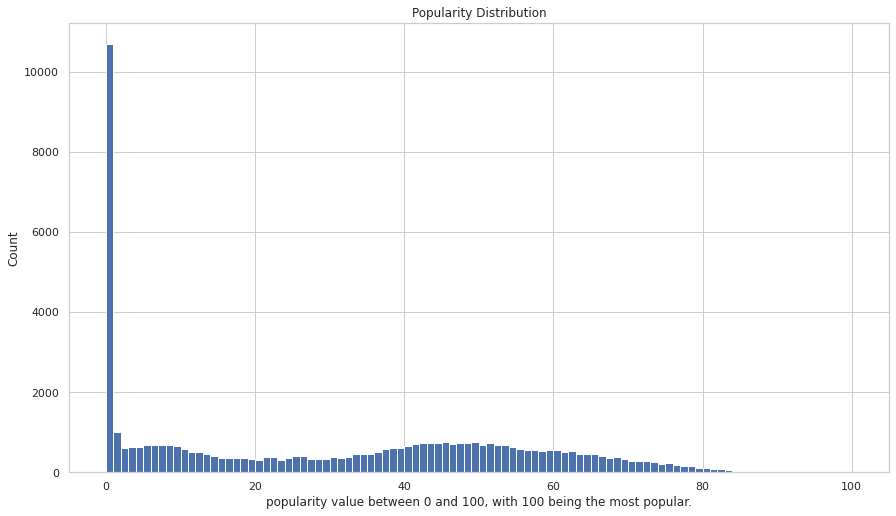

In [ ]:
df_clean = data.copy()
df_clean.artists = df_clean.artists.replace("['']",np.nan)
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

binsize = 1
bins = np.arange(0, df_clean['popularity'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df_clean, x = 'popularity', bins = bins)
plt.title('Popularity Distribution')
plt.xlabel('popularity value between 0 and 100, with 100 being the most popular.')
plt.ylabel('Count')
plt.show()

The popularity is right skewed as the popularity is calculated on the total number of plays the track has had and how recent those plays are. So it's reasonable that most of the tracks have a popularity of zero, and zero tracks have a popularity of 100

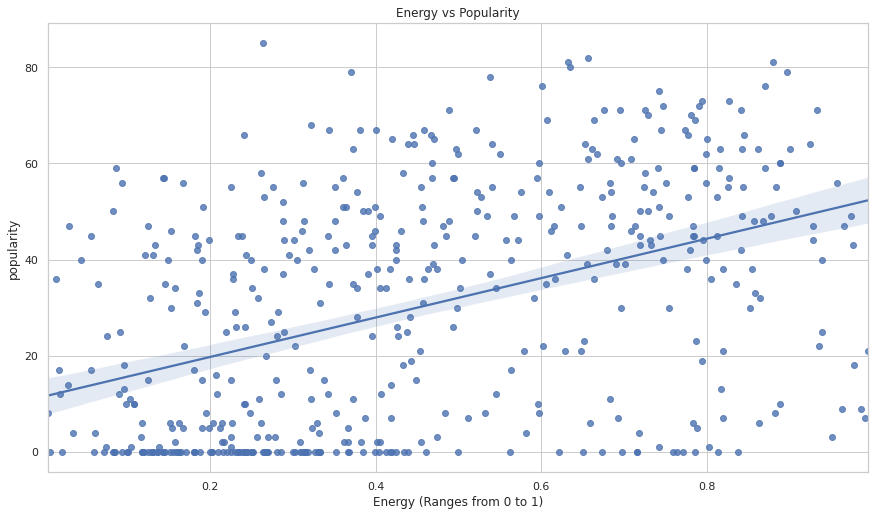

In [ ]:
plt.subplots(1,1,figsize=(14.70, 8.27)) #feature_1 affecting popularity
ax1 = sns.regplot(data = df_clean.sample(500), x = 'energy', y = 'popularity');
ax1.set_title('Energy vs Popularity');
ax1.set_xlabel('Energy (Ranges from 0 to 1)');

We can see that, the more energetic the song is, more popular it is.


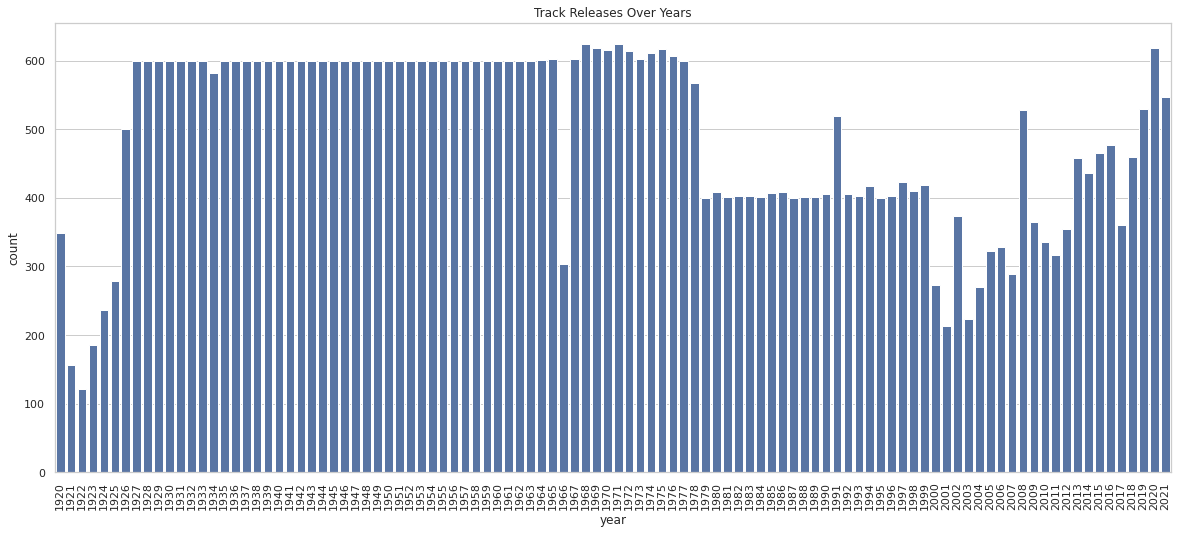

In [ ]:
df_clean['year'] = df_clean['release_date'].dt.year
base_color = sns.color_palette()[0]
plt.figure(figsize = [20, 8.27])
plt.xticks(rotation=90)
plt.title('Track Releases Over Years')
# Use the `color` argument
sns.countplot(data=df_clean, x='year', color=base_color);

**Generations of Music**

In [ ]:
def year(df):
    if df>1920 and df<=1945:
        return "Post-Great War"
    if df>1945 and df<=1970:
        return "Retro"
    if df>1970 and df<=1995:
        return "Modern"
    else:
        return "Post-Modern"
data['era'] = data['year'].apply(year)
plx.pie(data_frame = data, names = 'era', hole = 0.2, title = 'Eras of Music')

In [ ]:
def func(df):
    if df == 1:
        return 'Yes'
    else:
        return 'No'
data['isExplicit'] = data['explicit'].apply(func)
plx.pie(data_frame = data, names = 'isExplicit', hole = 0.2, title = 'Explicit')


In [ ]:
def loud(row):
    m=data['loudness'].median()
    sd=data['loudness'].std()
    if row['loudness']>=m+(1.5*sd):
        return "Extreme"
    elif row['loudness']>=m+(sd):
        return "Very_Loud"
    elif row['loudness']>=m+(0.5*sd):
        return "Loud"
    elif row['loudness']>=m-(0.5*sd):
        return "Soft"
    elif row['loudness']>=m-(sd):
        return "Very_Soft"
    else:
        return "Mellow"
data['is_loud']=data.apply(lambda row: loud(row), axis=1)
plx.pie(data_frame = data, names = 'is_loud', hole = 0.2, title = 'IS LOUD')

In [ ]:
def func(df):
    if df > 75:
        return 'Very_Popular'
    elif df > 50 and df < 76:
        return 'Popular'
    elif df > 25 and df < 51:
        return 'Average'
    else:
        return 'Not_popular'
data['isPopular'] = data['popularity'].apply(func)
plx.pie(data_frame = data, names = 'isPopular', hole = 0.2, title = 'Popularity')

In [ ]:
def energy(row):
    if row['energy']>=data['energy'].mean():
        return "High"
    else:
        return "Low"
data['en_type']=data.apply(lambda row: energy(row),axis=1)
plx.pie(names=data['en_type'],hole=0.2)

In [ ]:
isPopular= pd.get_dummies(data['isPopular'], drop_first=True)
isExplicit= pd.get_dummies(data['isExplicit'], drop_first=True)
isLoud= pd.get_dummies(data['is_loud'], drop_first=True)
data = pd.concat([data, isPopular, isExplicit, isLoud], axis = 1)
data.head()

acousticness                         artists  ...  Very_Loud  Very_Soft
49898       0.18400                 ['Taeko Onuki']  ...          0          0
1721        0.98800                 ['André Baugé']  ...          0          0
41036       0.64000               ['Antonio Morel']  ...          0          0
32231       0.40200                        ['Sade']  ...          0          0
37862       0.00704  ['Set It Off', 'Ash Costello']  ...          1          0

[5 rows x 33 columns]

In [ ]:
data.drop( ['id', 'name', 'artists', 'release_date','era','isExplicit','is_loud','isPopular','en_type'],
             axis = 1, inplace = True)

In [ ]:
data.head()

acousticness  danceability  duration_ms  ...  Soft  Very_Loud  Very_Soft
49898       0.18400         0.695       277707  ...     0          0          0
1721        0.98800         0.398       189753  ...     1          0          0
41036       0.64000         0.532       186018  ...     1          0          0
32231       0.40200         0.753       278307  ...     0          0          0
37862       0.00704         0.376       211027  ...     0          1          0

[5 rows x 24 columns]

Removing unnamed genres from the data set

In [ ]:
genre_df = genres

genre_df[genre_df['genres']=="[]"]
genre_df = genre_df[genre_df['genres']!="[]"]

In [ ]:
genre_df

mode                  genres  acousticness  ...   valence  popularity  key
0        1  21st century classical      0.979333  ...  0.103783   27.833333    6
1        1                   432hz      0.494780  ...  0.221750   52.500000    5
2        1                   8-bit      0.762000  ...  0.975000   48.000000    7
4        1              a cappella      0.676557  ...  0.448249   45.820071    7
5        1                abstract      0.459210  ...  0.307325   43.500000    1
...    ...                     ...           ...  ...       ...         ...  ...
2968     1                    zolo      0.222625  ...  0.596155   33.778943    9
2969     0                 zouglou      0.161000  ...  0.845000   58.000000    7
2970     1                    zouk      0.263261  ...  0.824111   46.666667    5
2971     0            zurich indie      0.993000  ...  0.739000    0.000000    7
2972     1                  zydeco      0.421038  ...  0.808544   30.261905    7

[2972 rows x 14 columns]

**Most Popular Genres**

In [ ]:
genre_df.sort_values("popularity",ascending=False).head()

mode               genres  acousticness  ...   valence  popularity  key
237      1             basshall      0.213167  ...  0.588667   80.666667    2
2533     1  south african house      0.043833  ...  0.834333   80.000000    1
2755     1      trap venezolano      0.044600  ...  0.706000   80.000000    1
2778     0          turkish edm      0.008290  ...  0.364000   80.000000    0
536      0   chinese electropop      0.002570  ...  0.199000   78.500000    1

[5 rows x 14 columns]

**Least Popular Genres**

In [ ]:
genre_df.sort_values("popularity",ascending=True).head()

mode                 genres  acousticness  ...   valence  popularity  key
590      1     classic eurovision      0.956000  ...  0.305000         0.0   10
1109     0                full on      0.002616  ...  0.372000         0.0   10
2637     0  swedish jazz orkester      0.989000  ...  0.730000         0.0    6
1113     0           funk 150 bpm      0.985000  ...  0.354000         0.0    0
1965     0              nisiotika      0.801646  ...  0.752729         0.0    7

[5 rows x 14 columns]

In [ ]:
from collections import Counter

genre_names_text = " ".join(genre_df['genres'].tolist()).split(" ")
column_names = ["word","count"]
most_common_words_in_genres_df = pd.DataFrame([dict(zip(column_names,word_count)) for word_count in Counter(genre_names_text).most_common(30)])

In [ ]:
fig = plx.bar(most_common_words_in_genres_df.sort_values("count"),x="count",y="word",labels={
                     "word": "Genres",
                     "count": "Frequency"},orientation='h')
fig.update_layout(height=600, width=1100, title_text="Most Common Genre Names")

fig.show()

# **Modelling**

###Feature Scaling

In [ ]:
X= data.loc[:,data.columns!='popularity']
y= data.loc[:,data.columns=='popularity']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_y= StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_lin=LinearRegression()
regressor_lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lin = regressor_lin.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
print("R2 Score for training data is: {}\n".format(regressor_lin.score(X_train, y_train)))
print("R2 Score for testing data is: {}\n".format(r2_score(y_test, y_pred_lin)))
print("Mean Squared Error of Linear Regression is: {}\n".format(mean_squared_error(y_test, y_pred_lin)))

R2 Score for training data is: 0.9310611402896821

R2 Score for testing data is: 0.9309031791886815

Mean Squared Error of Linear Regression is: 0.06907867004844478



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt= DecisionTreeRegressor(random_state=0)
regressor_dt.fit(X_train,y_train)

y_pred_dt= regressor_dt.predict(X_test)

In [ ]:
print("R2 Score for training data is: {}\n".format(regressor_dt.score(X_train, y_train)))
print("R2 Score for testing data is: {}\n".format(r2_score(y_test, y_pred_dt)))
print("Mean Squared Error of Decision Tree Regressor is: {}\n".format(mean_squared_error(y_test, y_pred_dt)))

R2 Score for training data is: 0.9997857565172227

R2 Score for testing data is: 0.9243544121005671

Mean Squared Error of Decision Tree Regressor is: 0.0756257168675636



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor()
regressor_rf.fit(X_train,y_train)

y_pred_rf=regressor_rf.predict(X_test)


In [ ]:
print("R2 score for training data is: {}\n".format(regressor_rf.score(X_train, y_train)))
print("R2 Score for testing data is: {}\n".format(r2_score(y_test, y_pred_rf)))
print("Mean Squared Error of Random Forest Regression is: {}\n".format(mean_squared_error(y_test, y_pred_rf)))

R2 score for training data is: 0.9944681602034666

R2 Score for testing data is: 0.9622029182550926

Mean Squared Error of Random Forest Regression is: 0.03778715298320723



In [ ]:
data.head()

acousticness  danceability  duration_ms  ...  Soft  Very_Loud  Very_Soft
49898       0.18400         0.695       277707  ...     0          0          0
1721        0.98800         0.398       189753  ...     1          0          0
41036       0.64000         0.532       186018  ...     1          0          0
32231       0.40200         0.753       278307  ...     0          0          0
37862       0.00704         0.376       211027  ...     0          1          0

[5 rows x 24 columns]

In [ ]:
def predict_ctr(acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,Not_popular,Popular,Very_Popular,Yes,Loud,Mellow,Soft,Very_Loud,Very_Soft):

    acousticness=float(acousticness)
    danceability = float(danceability)																						 	
    
    duration_ms=int(duration_ms)
    energy=float(energy)
    explicit=int(explicit)
    instrumentalness=float(instrumentalness)
    key=int(key)
    liveness=float(liveness)
    loudness=float(loudness)
    mode=int(mode)
    speechiness=float(speechiness)
    tempo=float(tempo)
    valence=float(valence)
    year=int(year)
    Not_popular=int(Not_popular)
    Popular=int(Popular)
    Very_Popular=int(Very_Popular)
    Yes=int(Yes)
    Loud=int(Loud)
    Mellow=int(Mellow)
    Soft=int(Soft)
    Very_Loud=int(Very_Loud)
    Very_Soft=int(Very_Soft)

    x = [[acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,Not_popular,popular,Very_Popular,Yes,Loud,Mellow,Soft,Very_Loud,Very_Soft]]
    x = sc.transform(x)

    return regressor_rf.predict(x)

In [ ]:
prediction = predict_ctr(0.170000,0.640,243573,0.878,0,0.000232,2,0.0632,-6.841,1,0.0335,115.700,0.795,1973,0,0,0,0,1,0,0,0,0)
print('The popularity score is',prediction)


In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(regressor_dt,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

grid_cv.fit(X_train,y_train)

print('the parameters are',grid_cv.best_params_)
grid_cv.best_score_

Fitting 3 folds for each of 6000 candidates, totalling 18000 fits
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.203, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.203, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=-0.200, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=best, score=-0.959, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random, score=-0.961, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random 
[CV]  max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random, score=-0.978, total=   0.0s
[CV] max_depth=9, max_features=log2, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.4, splitter=random 
[CV] 

[Parallel(n_jobs=1)]: Done 18000 out of 18000 | elapsed:  7.9min finished


the parameters are {'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


-0.09929930385609041

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt= DecisionTreeRegressor(max_depth= 3, max_features= 'auto', max_leaf_nodes= None, min_samples_leaf= 1, min_weight_fraction_leaf= 0.1, splitter= 'best')
regressor_dt.fit(X_train,y_train)

y_pred_dt= regressor_dt.predict(X_test)

In [ ]:
print("R2 Score for training data is: {}\n".format(regressor_dt.score(X_train, y_train)))
print("R2 Score for testing data is: {}\n".format(r2_score(y_test, y_pred_dt)))
print("Mean Squared Error of Decision Tree Regressor is: {}\n".format(mean_squared_error(y_test, y_pred_dt)))

R2 Score for training data is: 0.9006737578121663

R2 Score for testing data is: 0.9029422127241167

Mean Squared Error of Decision Tree Regressor is: 0.09703229156043351

